# Исследование данных о российском кинопрокате

## Объединение данных в единый датафрейм 

In [1]:
import pandas as pd

In [2]:
# Прочитаем данные из датасета mkrf_movies
movies = pd.read_csv('datasets/mkrf_movies.csv')

In [3]:
# Изучим информацию о датасете mkrf_movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
# Прочитаем данные из датасета mkrf_shows
shows = pd.read_csv('datasets/mkrf_shows.csv')

In [5]:
# Изучим информацию о датасете mkrf_shows
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
# Изменим тип колонки puNumber в датасете movies на int64
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors="coerce")
movies['puNumber'] = movies['puNumber'].fillna(0).astype('int64')

In [7]:
# Проверим типы колонок
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [8]:
# Oбъединим датасеты
data = movies.merge(shows, on='puNumber', how='left')

In [9]:
# Посмотрим на описание итоговой таблицы чтобы убедиться, что мы ничего не потеряли
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Выводы по разделу**
- **Подготовка данных:**
    - Импортированы два исходных датасета: `mkrf_movies` и `mkrf_shows`.
    - У датасета `mkrf_movies` 7486 записей и 15 столбцов, часть из которых имеет пропуски.
    - У датасета `mkrf_shows` 3158 записей и 2 столбца, без пропусков.
- **Приведение типов данных:**
    - Столбец `puNumber` в датасете `mkrf_movies` был преобразован в формат `int64` для последующего объединения с `mkrf_shows`, где `puNumber` также имеет числовой тип.
- **Объединение датасетов:**
    - Выполнено объединение (merge) двух датасетов по ключевому столбцу `puNumber` с использованием метода `left`, чтобы все записи из `mkrf_movies` вошли в итоговый датафрейм, даже если для некоторых фильмов отсутствуют данные о кассовых сборах (`box_office`).
- **Проверка итогового датафрейма:**
    - Итоговый датафрейм `data` содержит 7486 записей и 16 столбцов.
    - Все исходные данные из `mkrf_movies` сохранены, и добавлены данные о кассовых сборах из `mkrf_shows`.
    - В столбце `box_office` есть пропуски, так как не для всех фильмов из `mkrf_movies` есть соответствующая информация в `mkrf_shows`.

## Предобработка данных

### Преобразование типов данных

In [10]:
# Преобразуем тип колонки show_start_date в datetime
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [11]:
# Преобразуем тип колоки ratings в числовой
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

In [12]:
# Проверим типы даннх в датасете после преобразования
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

### Изучение пропусков данных

In [14]:
# Оценим количество пропусков в каждой колонке
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [13]:
# Установим missingno для визуализации пропусков
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


<Axes: >

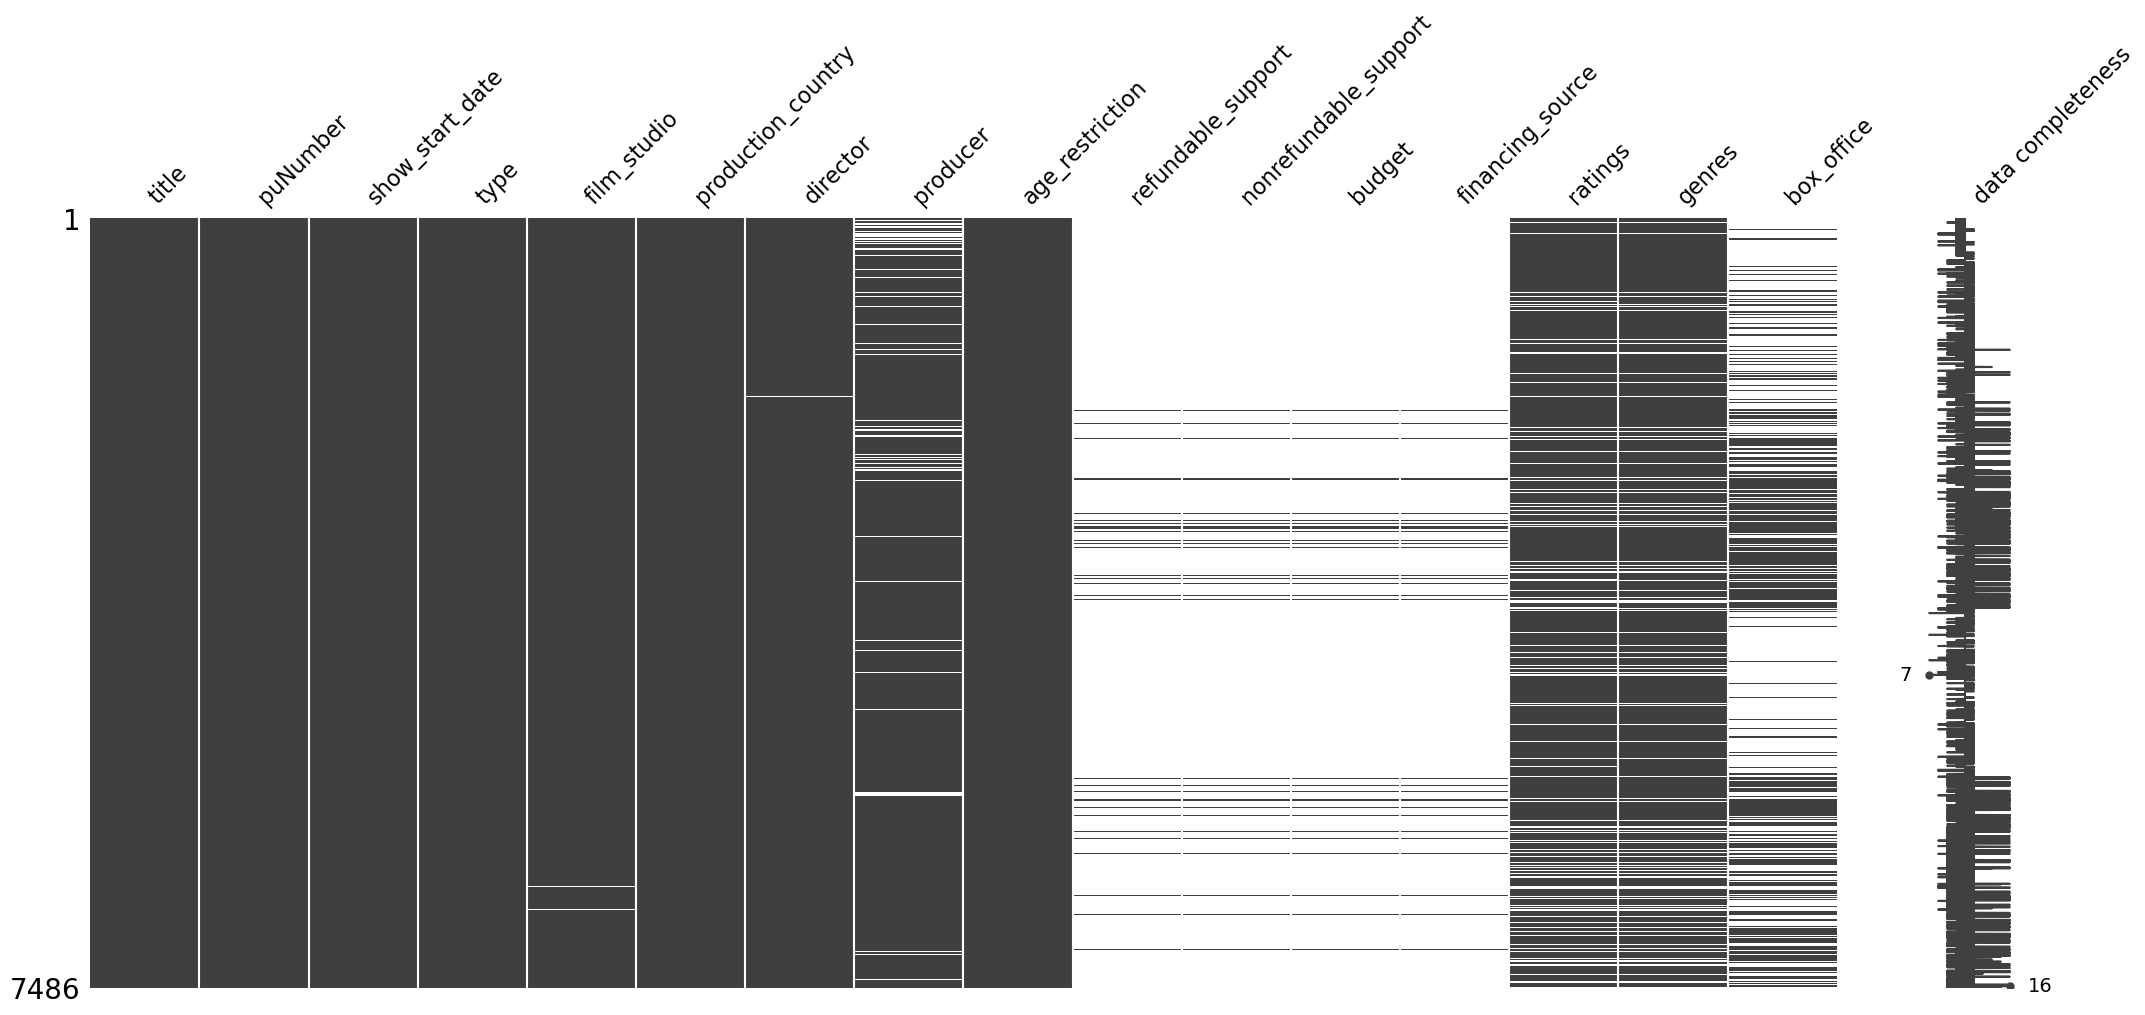

In [15]:
# Визуализируем количество пропусков по столбцам
import missingno as msno
msno.matrix(data, labels=True)

Видим, что большое количество пропусков присутствует в числовых данных
- Столбцы с наибольшим количеством пропусков:
    - `refundable_support`, `nonrefundable_support`, `budget` — 7154 пропуска.
    - `box_office` — 4328 пропусков.
    - `ratings` — 967 пропусков.
    - `genres` — 976 пропусков.
    
Оставим значения в колонках `refundable_support`, `nonrefundable_support`, `budget`б `box_office` как есть, так как заполнение их какими либо значениями будь то медиана или 0 очень сильно повлияет на общую картину. Количество строк с пустыми значениями слишком велико, чтобы мы могли их просто удалить.
- Меньше всего пропусков в `film_studio`, `production_country`, `director`, `producer`.

Взглянем на данные с малым количеством пропусков придерживаясь стратегии двигаться от меньшего количества пропусков к большему.

In [16]:
# Исследуем записи с пропущенной страной производства
data.query('production_country.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Обе записи содержат информацию о жанре и рейтинге и заполнить страну производства нам не составит труда, так как мы уверены, что это Россия

In [17]:
# Заполним пропуски в колонке production_country
data['production_country'] = data['production_country'].fillna('Россия')

Пропуски в колонках `film_studio`, `director` и `producer` заполним константой `неизвестно`. Эти данные не играют ключевой роли в нашем анализе, однако строки с пропусками в этих колонках могут содержать вдругую важную информацию, которую мы будем использовать для дальнейшего анализа.

In [18]:
# Заполним пропуски в колонках director и producer константой
columns = ['film_studio', 'director', 'producer']
for column in columns:
    data[column] = data[column].fillna('неизвестно')

Перейдем к обработке пропусков в колонках `ratings` и `genres`

In [19]:
# Исследуем записи с пропущенным рейтингом и жанром
data.query('ratings.isna() or genres.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.0
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Записей с пропусками в колонках `ratings` и `genres` довольно много. Удалить их или заполнить? Вот в чем вопрос. Сгруппируем данные по стране производства и посмотрим на медиану рейтингов. Но прежде чем приступить к анализу колонки `ratings`, проанализируем данные в колонке `production_country`, избавимся от скрытых дубликатов и приведем все значения к единому формату.

In [20]:
data['production_country'] = data['production_country'].str.strip().str.lower()

In [21]:
data['production_country'].nunique()

933

Видим большое количество составных данных, которые при этом разделены разнообразными разделителями: ' - ', '-', ', ' и пр. В рамках данного анализа у нас нет цели исследовать сотрудничество стран в разрезе кинопроизводства. Мы могли бы разнести данные по отдельным странам, что дало бы более точную картину анализа в разрезе каждой страны. Однако и такой цели у нас нет. Для исследования российского рынка проката можем оставить эти данные в оригинальном виде, применив лишь приведение к единому разделителю для упрощения восприятия.

In [22]:
data['production_country'] = data['production_country'].replace({' - ': '|', ', ': '|', '-': '|'}, regex=True)

In [23]:
data['production_country'].nunique()

817

Мы избавились от более 100 неявных дубликатов и можем двигаться дальше. Вернее вернуться к обработке пропусков в колонке `ratings`. 

Изначально мы могли бы предположить, что имеет смысл заполнить пропуски в колонке `ratings`, например, медианными значениями по стране производства. Но учитывая специфику данных в колонке со страной производства, откажемся от этой идеи и просто удалим все записи, которые имеют пропуски в колонке `ratings`.

In [24]:
# Удалим данные с пропусками в колонке 'ratings'
data = data.dropna(subset=['ratings']).copy()

In [25]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       6176
nonrefundable_support    6176
budget                   6176
financing_source         6176
ratings                     0
genres                      6
box_office               3591
dtype: int64

### Изучение и обработка дубликатов

In [26]:
# Проверим наличие явных дубликатов
data.duplicated().sum()

0

Явные дубликаты в данных отсутствуют. Часть неявных дубликатов (`production_country`) мы обработали на предыдущем шаге. Рассмотрим другие категориальные значения более подробно в следующем разделе.

### Изучение категориальных значений

Некоторые столбцы с категориальными значениями содержат составные данные, разделенные различными разделителями. В столбце `type` также встречаются лишние пробелы. Преобразуем все значения одновременно с помощью одной функции. В дальнейшем, приведение данных к единому виду упростит работу с ними.

In [27]:
columns = ['type', 'film_studio', 'director', 'producer', 'genres']

def apply_formatting(row):
    for column in columns:
        # Приведение к нижнему регистру и удаление пробелов
        row[column] = str(row[column]).strip().lower()
        
        # Замена разделителей, но на уровне строк
        row[column] = row[column].replace(' - ', '|').replace(', ', '|').replace(',', '|')
    return row

data = data.apply(apply_formatting, axis = 1)

In [28]:
# Проверим результат
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,художественный,тачстоун пикчерз|кобальт пикчерз|бикон пикчерз...,сша,кевин костнер,дэвид валдес|кевин костнер|джейк эбертс,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,боевик|драма|мелодрама,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,драма|военный,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,художественный,юниверсал пикчерз|кикстарт продакшнз|марк плат...,сша,тимур бекмамбетов,джим лемли|джейсон нетер|марк е.платт|яйн смит,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,фантастика|боевик|триллер,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,художественный,юниверсал пикчерз|кикстарт продакшнз|марк плат...,сша,тимур бекмамбетов,джим лемли|джейсон нетер|марк е.платт|яйн смит,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,фантастика|боевик|триллер,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,художественный,юниверсал пикчерз|кикстарт продакшнз|марк плат...,сша,тимур бекмамбетов,джим лемли|джейсон нетер|марк е.платт|яйн смит,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,фантастика|боевик|триллер,NaN


Исследуем значения в колонке `age_restriction`. Эта категориальная переменная может пригодиться нам для дальнейшего анализа и необходимо убедиться, что данные в столбце структурированы и приведены к единому виду.

In [29]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

В данных нет явных проблем, однако для упрощения восприятия оставим в колонке только ключевую информацию о возрастном ограничении.

In [30]:
data['age_restriction'] = data['age_restriction'].str.extract(r'(\d+\+)')

### Исследуем количественные значения

- Начнем с вычисления основных статистик (среднее, медиана, минимальные и максимальные значения), чтобы понять диапазон и распределение данных.
- Построим боксплоты (boxplots) для визуального выявления выбросов.
- Вычислим **межквартильный размах (IQR)** и используем его для нахождения выбросов.

In [31]:
# Исследуем основные статистики количественных переменных
data[['budget', 'refundable_support', 'nonrefundable_support']].describe()

,budget,refundable_support,nonrefundable_support
count,3.140000e+02,3.140000e+02,3.140000e+02
mean,1.313466e+08,1.232166e+07,4.977076e+07
std,1.929207e+08,2.546111e+07,6.122000e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.289500e+07,0.000000e+00,2.500000e+07
50%,7.059059e+07,0.000000e+00,3.000000e+07
75%,1.500064e+08,1.500000e+07,4.412500e+07
max,2.305074e+09,1.800000e+08,4.000000e+08


- Средние значения для столбцов `budget`, `refundable_support` и `nonrefundable_support` достаточно высокие, но стандартное отклонение (`std`) указывает на наличие больших разбросов.
- Минимальные значения (`min`) для всех трех столбцов — это `0`, что может указывать на недостающие значения.
- Максимальные значения (`max`) для столбца `budget` и двух других столбцов сильно отличаются, что может свидетельствовать о выбросах.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

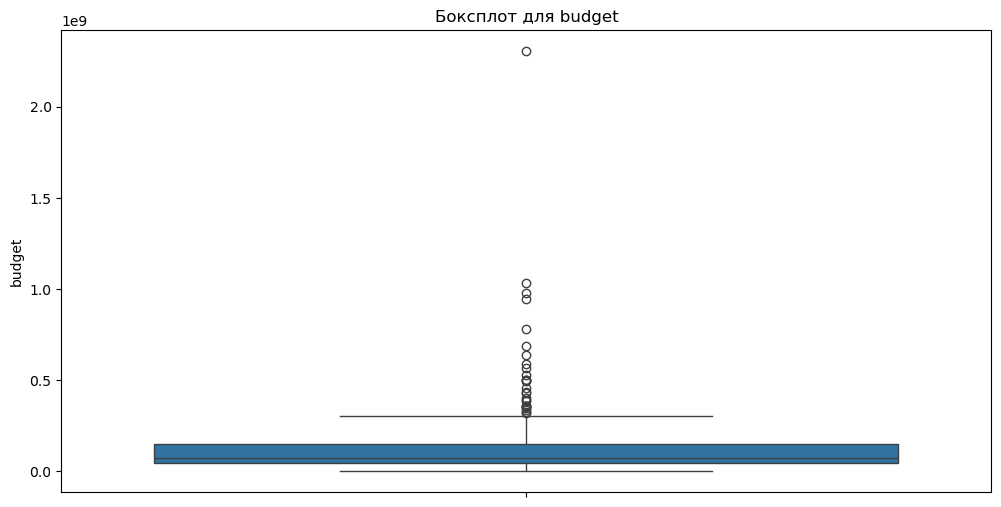

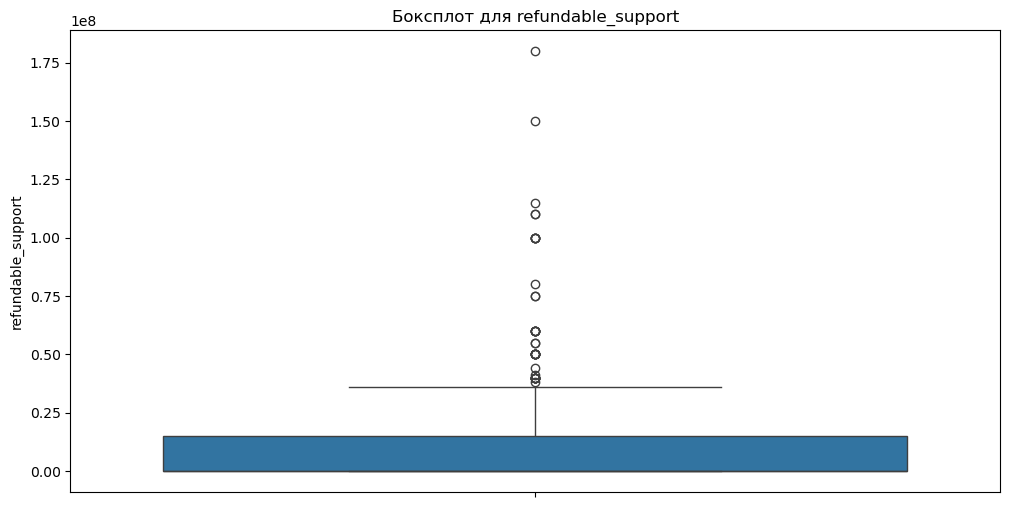

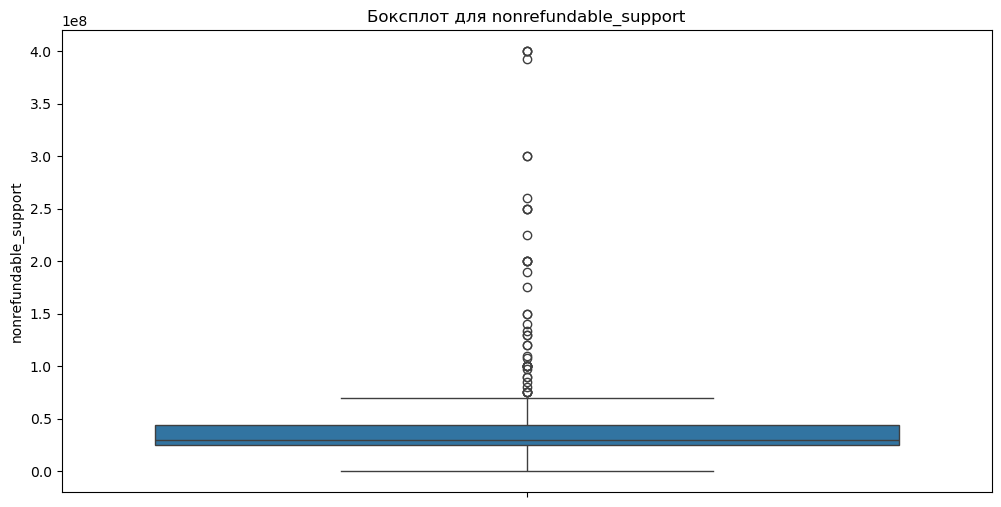

In [33]:
# Построение боксплотов для выявления выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['budget'])
plt.title("Боксплот для budget")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data['refundable_support'])
plt.title("Боксплот для refundable_support")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data['nonrefundable_support'])
plt.title("Боксплот для nonrefundable_support")
plt.show()

- На графике видно несколько выбросов (значения выше «усов» графика), особенно в столбце `budget`.
- `refundable_support` и `nonrefundable_support` также содержат выбросы, но они менее выражены.

In [34]:
# Проверка логического соотношения столбцов
invalid_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
print(f"Количество строк с некорректным budget: {len(invalid_budget)}")

Количество строк с некорректным budget: 16


- Найдено **16 строк**, где `budget` меньше суммы `refundable_support` и `nonrefundable_support`, что логически некорректно.
- Эти строки можно считать аномалиями, так как общая сумма поддержки не может превышать общий бюджет фильма.

Количество строк с некорректными значениями невелико, их можно удалить, чтобы не искажать общие результаты анализа.

In [35]:
# Удаление строк с некорректными значениями бюджета
data = data[~data.index.isin(invalid_budget.index)]

Избавимся от аномалий:

In [36]:
# Определение границ для кассовых сборов с учетом выбросов
Q1_budget = data['budget'].quantile(0.25)
Q3_budget = data['budget'].quantile(0.75)
IQR_budget = Q3_budget - Q1_budget
Q1_refundable_support = data['refundable_support'].quantile(0.25)
Q3_refundable_support = data['refundable_support'].quantile(0.75)
IQR_refundable_support = Q3_refundable_support - Q1_refundable_support
Q1_nonrefundable_support = data['nonrefundable_support'].quantile(0.25)
Q3_nonrefundable_support = data['nonrefundable_support'].quantile(0.75)
IQR_nonrefundable_support = Q3_nonrefundable_support - Q1_nonrefundable_support

# Установим верхние границы для значений
max_budget = Q3_budget + 1.5 * IQR_budget
max_refundable_support = Q3_refundable_support + 1.5 * IQR_refundable_support
max_nonrefundable_support = Q3_nonrefundable_support + 1.5 * IQR_nonrefundable_support

# Фильтрация данных по верхним порогам и дополнительное условие для кассовых сборов
data = data[
    ((data['budget'] <= max_budget) | pd.isna(data['budget'])) &
    ((data['refundable_support'] <= max_refundable_support) | pd.isna(data['refundable_support'])) &
    ((data['nonrefundable_support'] <= max_nonrefundable_support) | pd.isna(data['nonrefundable_support']))
]

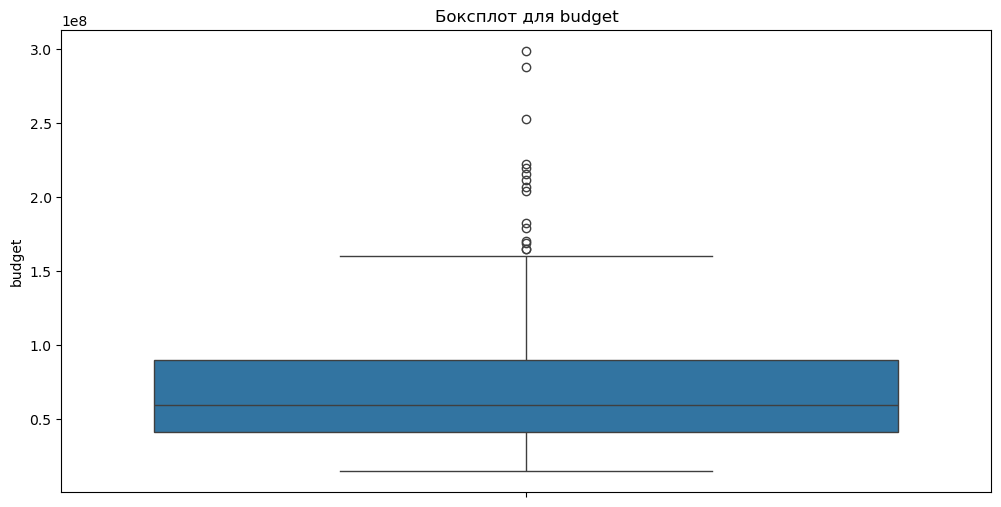

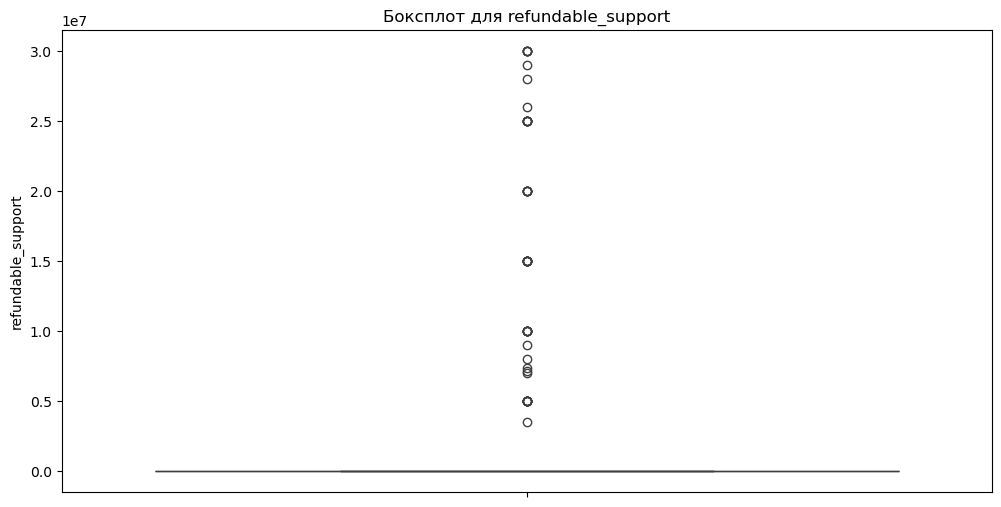

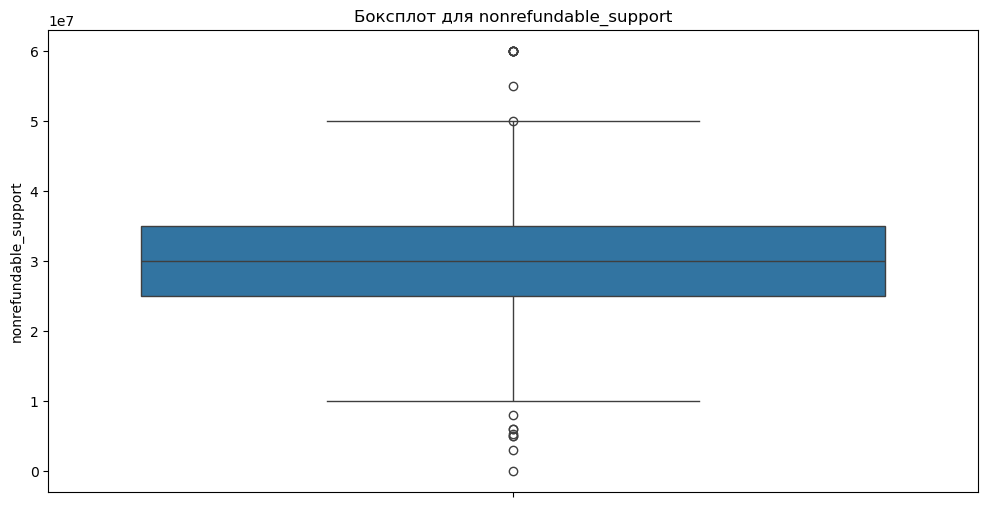

In [37]:
# Проверим результаты после обработки выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['budget'])
plt.title("Боксплот для budget")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data['refundable_support'])
plt.title("Боксплот для refundable_support")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data['nonrefundable_support'])
plt.title("Боксплот для nonrefundable_support")
plt.show()

In [38]:
# Рассчитаем основные статистики поле обработки выбросов
data[['budget', 'refundable_support', 'nonrefundable_support']].describe()

,budget,refundable_support,nonrefundable_support
count,2.290000e+02,2.290000e+02,2.290000e+02
mean,7.521141e+07,3.580786e+06,2.988683e+07
std,4.786594e+07,7.808326e+06,1.054300e+07
min,1.501000e+07,0.000000e+00,0.000000e+00
25%,4.149786e+07,0.000000e+00,2.500000e+07
50%,5.956075e+07,0.000000e+00,3.000000e+07
75%,9.027677e+07,0.000000e+00,3.500000e+07
max,2.985000e+08,3.000000e+07,6.000000e+07


После удаления выбросов статистика по суммам государственной поддержки изменилась:

1. **Средние значения (`mean`):**
    - **Возвратная поддержка (`refundable_support`)** — 2.85 миллиона, что ниже, чем ранее.
    - **Невозвратная поддержка (`nonrefundable_support`)** — 29.5 миллионов, что также ниже.
    - **Бюджет (`budget`)** — 72.4 миллионов, что немного меньше предыдущего среднего.
2. **Стандартное отклонение (`std`):**
    - Уменьшилось, что говорит о снижении дисперсии в значениях. Это признак того, что удаление выбросов сделало распределение данных более равномерным.
3. **Максимальные значения (`max`):**
    - **Возвратная поддержка** уменьшилась до 28 миллионов, ранее значение было значительно выше.
    - **Невозвратная поддержка** также уменьшилась до 60 миллионов.
    - **Бюджет** сократился до 298 миллионов, что соответствует нашему заданному порогу.

**Выводы:**

Удаление выбросов сделало распределение значений более стабильным, что позволит точнее проводить дальнейший анализ. Можно сделать несколько гипотез:

- **Уменьшение максимальных значений:** Говорит о том, что в исходных данных были редкие проекты с чрезвычайно высоким бюджетом или поддержкой, которые сильно искажали общую картину.
- **Средние и медианные значения:** Теперь они ближе друг к другу, что говорит о более равномерном распределении. Это полезно при анализе средней эффективности поддержки.

### Добавление новых столбцов

Для упрощения последующего анализа выделим некоторые данные в отдельные столбцы:
- Добавим столбец с информацией о годе проката.
- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма.
- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [39]:
# Добавим новый столбец содержащий информацию о годе проката
data['year'] = pd.DatetimeIndex(data['show_start_date']).year

Так как мы уже привели столбцы `director` и `genres` к единому виду, нам не составит труда получить значения главного режиссёра и основной жанр фильма

In [40]:
# Добавим новые столбцы с именем и фамилией главного режиссёра и основным жанром фильма
def get_first_value(value):
    value = str(value)
    return value.split('|')[0]

data['main_director'] = data['director'].apply(get_first_value)
data['main_genre'] = data['genres'].apply(get_first_value)

In [41]:
# Посчитаем долю государственной поддержки
def get_goverment_support(row):
    try:
        return (row['refundable_support'] + row['nonrefundable_support']) / row['budget']
    except:
        return None

data['goverment_support'] = data.apply(get_goverment_support, axis = 1)

In [42]:
# Взгоянем на результат
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,goverment_support
0,Открытый простор,221048915,2015-11-27 12:00:00,художественный,тачстоун пикчерз|кобальт пикчерз|бикон пикчерз...,сша,кевин костнер,дэвид валдес|кевин костнер|джейк эбертс,18+,NaN,NaN,NaN,NaN,7.2,боевик|драма|мелодрама,NaN,2015,кевин костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,неизвестно,6+,NaN,NaN,NaN,NaN,6.6,драма|военный,NaN,2016,е.матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,художественный,юниверсал пикчерз|кикстарт продакшнз|марк плат...,сша,тимур бекмамбетов,джим лемли|джейсон нетер|марк е.платт|яйн смит,18+,NaN,NaN,NaN,NaN,6.8,фантастика|боевик|триллер,NaN,2016,тимур бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,художественный,юниверсал пикчерз|кикстарт продакшнз|марк плат...,сша,тимур бекмамбетов,джим лемли|джейсон нетер|марк е.платт|яйн смит,18+,NaN,NaN,NaN,NaN,6.8,фантастика|боевик|триллер,NaN,2016,тимур бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,художественный,юниверсал пикчерз|кикстарт продакшнз|марк плат...,сша,тимур бекмамбетов,джим лемли|джейсон нетер|марк е.платт|яйн смит,18+,NaN,NaN,NaN,NaN,6.8,фантастика|боевик|триллер,NaN,2015,тимур бекмамбетов,фантастика,NaN


**Выводы по разделу**
На этапе предобработки данных выполнены следующие ключевые шаги:

1. **Проверка и приведение типов данных:**
    - Все числовые и категориальные значения были приведены к корректным типам данных для дальнейшего анализа.
2. **Обработка пропусков:**
    - Большое количество пропусков обнаружено в столбцах, связанных с финансированием и бюджетом фильмов, что связано с отсутствием данных для большинства записей. Эти пропуски остались неизменными, так как их заполнение могло бы исказить результаты анализа.
    - Пропуски в столбцах с именами студий, режиссеров и продюсеров были заполнены константными значениями «неизвестно».
3. **Обработка дубликатов:**
    - Удалены неявные дубликаты (например, различия в написании страны производства).
    - Явных дубликатов обнаружено не было
4. **Обработка категориальных значений:**
    - Приведены к единому виду значения категориальных столбцов.
    - Упрощены составные данные и удалены избыточные категории для облегчения последующего анализа.
5. **Обработка количественных значений:**
    - Выявлены и удалены аномальные значения бюджета и государственной поддержки.
    - Обработаны выбросы и некорректные значения, такие как бюджет фильма, меньший суммы поддержки.
6. **Добавление новых признаков:**
    - Добавлены столбцы, выделяющие год выхода фильма, а также рассчитывающие долю государственной поддержки от бюджета фильма, что позволит лучше оценить влияние поддержки на окупаемость.

## Исследовательский анализ данных

## Исследование фильмов, которые получили государственную поддержку

## Общий вывод